In [808]:
# Load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
os.listdir()
os.getcwd()
os.chdir('C:\\Users\\THIEN\\Downloads')
with open('US_Census_Data3.csv', newline='') as csvfile:
    df = csv.reader(csvfile, delimiter=' ',quotechar='|')
    df = pd.read_csv(csvfile, header=1)
    df = df.fillna(' ')
df.index

RangeIndex(start=0, stop=52, step=1)

In [809]:
# Inspect the dataset
df.info()
df.describe()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 290 entries, id to Margin of Error!!Percent Female MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others
dtypes: float64(120), int64(144), object(26)
memory usage: 117.9+ KB


,id,Geographic Area Name,Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher,Margin of Error!!Total MOE!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Percent!!Total population 25 years and over with a Bachelor's degree or higher,Margin of Error!!Percent MOE!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher,Margin of Error!!Male MOE!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Percent Male!!Total population 25 years and over with a Bachelor's degree or higher,Margin of Error!!Percent Male MOE!!Total population 25 years and over with a Bachelor's degree or higher,...,"Estimate!!Percent!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Margin of Error!!Percent MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Margin of Error!!Male MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Percent Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Margin of Error!!Percent Male MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Margin of Error!!Female MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Percent Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Margin of Error!!Percent Female MOE!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others"
0,0400000US02,Alaska,146428,5876,na,na,69394,4096,na,na,...,17.8,3.5,2027,665,13.7,4.3,3084,895,22.2,6.0
1,0400000US23,Maine,310050,7257,na,na,137913,5012,na,na,...,25.1,2.3,8810,1240,21.7,2.9,12150,1554,28.3,3.4
2,0400000US37,North Carolina,2266801,22745,na,na,1028548,13432,na,na,...,21.1,1.1,44250,3341,19.4,1.3,51610,3555,22.9,1.5
3,0400000US29,Missouri,1235894,14543,na,na,572267,8853,na,na,...,17.9,1.3,22340,2414,17.6,1.7,20844,1970,18.2,1.7
4,0400000US42,Pennsylvania,2862482,22906,na,na,1358139,13008,na,na,...,19.2,0.7,52123,2507,17.3,0.8,57192,3055,21.3,1.1


In [810]:
# Clean out columns with Margin of Error and Percent
for col in df.columns:
    if 'Margin of Error' in col:
        del df[col]

df= df[df.columns.drop(['id'])]
df.reset_index()
df.dropna(thresh=10)
df.head(1)

,Geographic Area Name,Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Percent!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Percent Male!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Percent Female!!Total population 25 years and over with a Bachelor's degree or higher,Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering,Estimate!!Percent!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering,Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering,...,Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Education,Estimate!!Percent Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Education,Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Education,Estimate!!Percent Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Education,"Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Percent!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Percent Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others","Estimate!!Percent Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others"
0,Alaska,146428,na,69394,na,77034,na,56690,38.7,33792,...,1904,12.8,4681,33.8,5111,17.8,2027,13.7,3084,22.2


In [811]:
# Assign new references to index, columns, values of the dataframe
>>> index = df.index
>>> columns = df.columns
>>> values = df.values
>>> index
columns
values

array([['Alaska', 146428, 'na', ..., 13.7, 3084, 22.2],
       ['Maine', 310050, 'na', ..., 21.7, 12150, 28.3],
       ['North Carolina', 2266801, 'na', ..., 19.4, 51610, 22.9],
       ...,
       ['District of Columbia', 302170, 'na', ..., 30.7, 7496, 36.1],
       ['Utah', 652445, 'na', ..., 14.8, 11870, 23.7],
       ['New York', 5091466, 'na', ..., 22.5, 131662, 27.4]], dtype=object)

In [812]:
############################
###########################

# STATES #
# Chart 1 : Higher education degree attainment by state

# Rename columns 
df.rename(columns={
 "Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher":'tot',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher":'tot_male',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher":'tot_female'}, inplace=True)

#create a dataframe with relevant variables
df_total = df[['tot', 'tot_male', 'tot_female']]

In [813]:
# Create a pivot table
df.pivot_table(index="Geographic Area Name", values=df_total).sort_values(by='tot',ascending=False)[:5]

# States with the largest population with a bachelor's degree in total

,tot,tot_female,tot_male
Geographic Area Name,,,
California,9171076,4720335,4450741
Texas,5600777,2912227,2688550
New York,5091466,2748705,2342761
Florida,4647230,2430765,2216465
Illinois,3052684,1615866,1436818


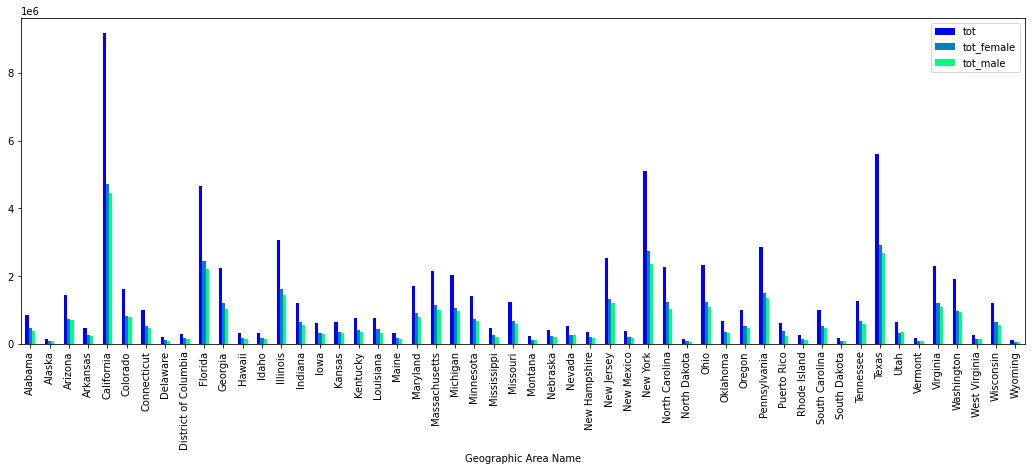

In [814]:
# VISUALIZATION #

# Create a plot (bar chart)
df.pivot_table(index="Geographic Area Name", values=df_total).plot(kind='bar',figsize=[18,6], colormap='winter')

# The states with the highest count of bachelor's degree attainment is California
# followed by Texas, New York, Florida, Pennsylvania, and Illinois.


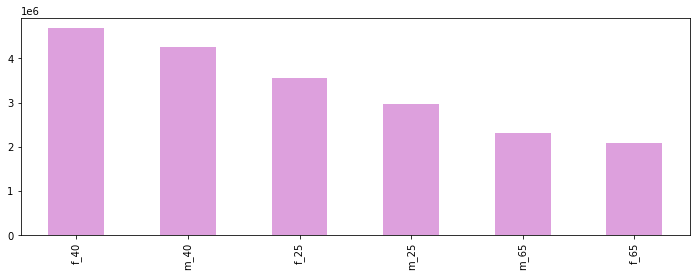

In [815]:
############################
###########################

# AGE GROUPS #
# Chart 2: Higher education degree attainment by age groups

# Rename columns
df.rename(columns={
    
 "Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!25 to 39 years":'tot_25',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!25 to 39 years":'m_25',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!25 to 39 years":'f_25',

 "Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years":'tot_40',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years":'m_40',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years":'f_40',

 "Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over":'tot_65',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over":'m_65',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over":'f_65',
          
},inplace=True)

# Create a dataframe with relevant variables for plotting
df_age_by_sex=df[['m_25','f_25','m_40','f_40','m_65','f_65',]]

# Create a plot (bar chart)
df.pivot_table(index="Geographic Area Name", values=df_age_by_sex)[:10].sum().sort_values(ascending=False).plot(kind='bar',figsize=[12,4],color='plum')


In [816]:
# Calculate the difference/ration of male and female educ attainment by age

print(df['m_25'].sum() / df['f_25'].sum())
print(df['m_40'].sum() / df['f_40'].sum())
print(df['m_65'].sum() / df['f_65'].sum())


# Only for the age group 65 and over does the male:female education attainment rate >1, 
# indicating more males have a bachelor's degree than females. 
# However, such a ratio is reverted for all the younger age groups, with females outpacing males by 13-19%

0.8135204313123984
0.8792170200267513
1.0903993068344857


In [817]:
# States with the largest numbers bacherlor's degree owners by age groups

print(df[['tot_25','Geographic Area Name']].sort_values(by='tot_25',ascending=False)[:3])
print(df[['tot_40','Geographic Area Name']].sort_values(by='tot_40',ascending=False)[:3])
print(df[['tot_65','Geographic Area Name']].sort_values(by='tot_65',ascending=False)[:3])


     tot_25 Geographic Area Name
9   3258500           California
12  2001865                Texas
51  1902302             New York
     tot_40 Geographic Area Name
9   4087533           California
12  2612804                Texas
51  2242747             New York
     tot_65 Geographic Area Name
9   1825043           California
47  1266955              Florida
12   986108                Texas


In [818]:
############################
###########################

# DEGREE TYPE #
# Chart 3+4: Higher education degree attainment by degree type

# Rename columns
df.rename(columns={
    
 "Estimate!!Total!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering":'tot_sci_eng',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering":'m_sci_eng',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering":'f_sci_eng'

},inplace=True)

# DEGREE TYPE - FEMALE
df.rename(columns={

 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering Related Fields":'f_sci_rel',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!Business":'f_biz',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!Education":'f_edu',
 "Estimate!!Female!!Total population 25 years and over with a Bachelor's degree or higher!!Arts, Humanities and Others":'f_art',

},inplace=True)

# DEGREE TYPE - MALE
df.rename(columns={

 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering Related Fields":'m_sci_rel',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Business":'m_biz',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Education":'m_edu',
 "Estimate!!Male!!Total population 25 years and over with a Bachelor's degree or higher!!Arts, Humanities and Others":'m_art',

},inplace=True)

In [821]:
df[["Geographic Area Name",'m_sci_eng','m_sci_rel','m_biz','m_edu','m_art']][:10]

,Geographic Area Name,m_sci_eng,m_sci_rel,m_biz,m_edu,m_art
0,Alaska,33792,4120,9895,5777,15810
1,Maine,57614,9016,26439,10107,34737
2,North Carolina,438781,49507,255810,57659,226791
3,Missouri,224935,35025,148643,44144,119520
4,Pennsylvania,572649,77067,334487,101789,272147
5,Michigan,420537,64223,229801,71112,183613
6,Nebraska,73537,10338,51782,19594,38912
7,Oregon,232913,28087,87912,25362,105589
8,Wyoming,25065,3652,6498,7343,8570
9,California,2249641,225477,888908,139321,947394


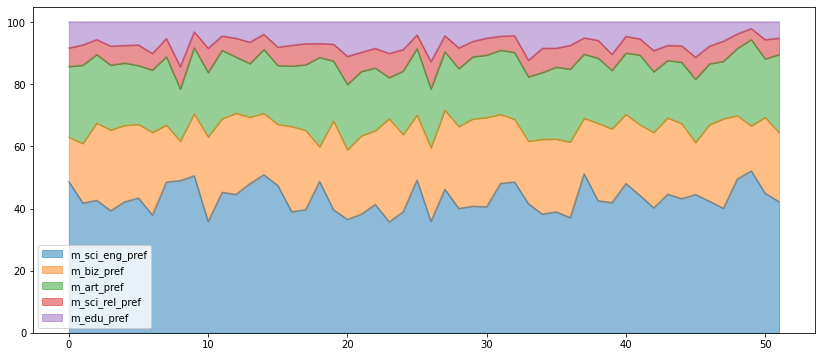

In [822]:
# Male Degree Type Preference

# Calculate the ratio
df['m_sci_eng_pref'] = df['m_sci_eng']/df['tot_male'] * 100
df['m_biz_pref'] = df['m_biz']/df['tot_male'] * 100
df['m_art_pref'] = df['m_art']/df['tot_male'] * 100
df['m_sci_rel_pref'] = df['m_sci_rel']/df['tot_male'] * 100
df['m_edu_pref'] = df['m_edu']/df['tot_male'] * 100

# Create a dataframe with relevant variables
deg_pref = df[['m_sci_eng_pref','m_biz_pref','m_art_pref','m_sci_rel_pref','m_edu_pref']]

# Create a plot (area plot)
deg_pref.plot.area(figsize=[14,6],stacked=True, alpha=0.5)

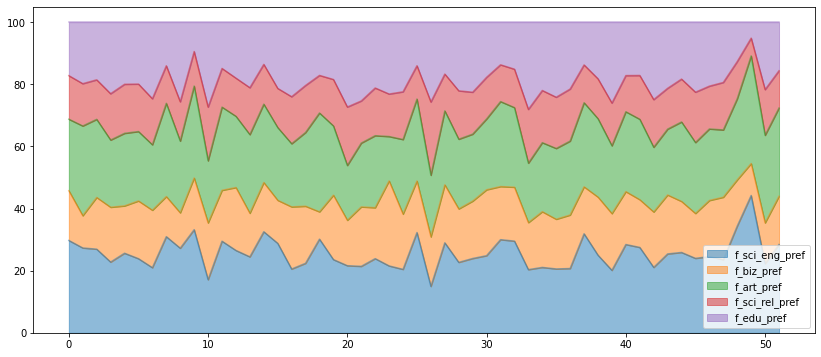

In [823]:
# Female Degree Type Preference

# Calculate the ratio
df['f_sci_eng_pref'] = df['f_sci_eng']/df['tot_female'] * 100
df['f_biz_pref'] = df['f_biz']/df['tot_female'] * 100
df['f_art_pref'] = df['f_art']/df['tot_female'] * 100
df['f_sci_rel_pref'] = df['f_sci_rel']/df['tot_female'] * 100
df['f_edu_pref'] = df['f_edu']/df['tot_female'] * 100

# Create a dataframe with relevant variables
deg_pref = df[['f_sci_eng_pref','f_biz_pref','f_art_pref','f_sci_rel_pref','f_edu_pref']]

# Create a plot (area plot)
deg_pref.plot.area(figsize=[14,6],stacked=True, alpha=0.5)